In [1]:
import pandas as pd
file_path = 'energy_analysis_2.xlsx'
df = pd.read_excel(file_path)
print(df.columns)

Index([' Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'],
      dtype='object')


In [3]:
import pandas as pd

# Load the Excel file with the correct header row
file_path = 'energy_analysis_2.xlsx'
df = pd.read_excel(file_path, header=2)  # Specify that headers are in the third row

# Print column names to verify
print(df.columns)

# Optionally, check the first few rows of the DataFrame
print(df.head())

Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')
   Hour     Date/hour start  Solar electricity generation (kWh)  \
0     0 2020-01-01 00:00:00                                 0.0   
1     1 2020-01-01 01:00:00                                 0.0   
2     2 2020-01-01 02:00:00                                 0.0   
3     3 2020-01-01 03:00:00                                 0.0   
4     4 2020-01-01 04:00:00                                 0.0   

   Electricity usage (kWh)  
0                 1.509849  
1                 1.411859  
2                 1.023898  
3                 0.642000  
4                 0.960000  


In [4]:
# Convert 'Hour' to integer if not already
df['Hour'] = df['Hour'].astype(int)

# Ensure 'Date/hour start' is in datetime format
df['Date/hour start'] = pd.to_datetime(df['Date/hour start'])

# Check data types
print(df.dtypes)


Hour                                           int32
Date/hour start                       datetime64[ns]
Solar electricity generation (kWh)           float64
Electricity usage (kWh)                      float64
dtype: object


In [5]:
# Save to Excel
output_file_path = 'energy_analysis_output_file.xlsx'
df.to_excel(output_file_path, index=False)

# Save to CSV (optional)
output_csv_path = 'energy_analysis_output_file.csv'
df.to_csv(output_csv_path, index=False)

In [6]:
import pandas as pd

# Load the CSV file
input_csv_path = 'energy_analysis_output_file.csv'
df = pd.read_csv(input_csv_path)

# Convert 'Date/hour start' column to PostgreSQL timestamp format
df['Date/hour start'] = pd.to_datetime(df['Date/hour start']).dt.strftime('%Y-%m-%d %H:%M')

# Save the DataFrame to a new CSV file
output_csv_path = 'energy_analysis_data.csv'
df.to_csv(output_csv_path, index=False)

print("Date format conversion complete. New file saved.")


Date format conversion complete. New file saved.


In [9]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('energy_analysis_data.csv')

# Filter the DataFrame to find rows where electricity usage is greater than 50
outliers = df[df['Electricity usage (kWh)'] > 50]

# Print the rows that have been identified as outliers
print(outliers)


      Hour   Date/hour start  Solar electricity generation (kWh)  \
276     12  2020-01-12 12:00                               5.214   
1579    19  2020-03-07 19:00                               0.012   
1603    19  2020-03-08 19:00                               0.006   
2202    18  2020-04-02 18:00                               0.084   
5562    18  2020-08-20 18:00                               0.225   
6740    20  2020-10-08 20:00                               0.000   
8011    19  2020-11-30 19:00                               0.000   
8204    20  2020-12-08 20:00                               0.003   
8276    20  2020-12-11 20:00                               0.009   
8300    20  2020-12-12 20:00                               0.003   
8348    20  2020-12-14 20:00                               0.006   
8635    19  2020-12-26 19:00                               0.006   

      Electricity usage (kWh)  
276                46000.0000  
1579                  59.6046  
1603               

In [15]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('energy_analysis_data.csv')

# Print summary statistics to understand the range of values
print(df['Solar electricity generation (kWh)'].describe())

# Define a threshold for outliers; you can adjust the value based on your data
outliers = df[df['Solar electricity generation (kWh)'] > 10]  # Example threshold

# Print the rows with potential outliers
print(outliers)

count    8760.000000
mean        1.116750
std         2.026098
min         0.000000
25%         0.000000
50%         0.024000
75%         1.272750
max        13.050000
Name: Solar electricity generation (kWh), dtype: float64
      Hour   Date/hour start  Solar electricity generation (kWh)  \
2569     1  2020-04-18 01:00                              13.050   
3107    11  2020-05-10 11:00                              10.998   
3707    11  2020-06-04 11:00                              10.359   
3851    11  2020-06-10 11:00                              10.122   
4163    11  2020-06-23 11:00                              10.152   
4426    10  2020-07-04 10:00                              10.518   
4523    11  2020-07-08 11:00                              10.383   
4811    11  2020-07-20 11:00                              10.776   

      Electricity usage (kWh)  
2569                 0.315968  
3107                 0.000000  
3707                 0.183000  
3851                 8.460000  
41

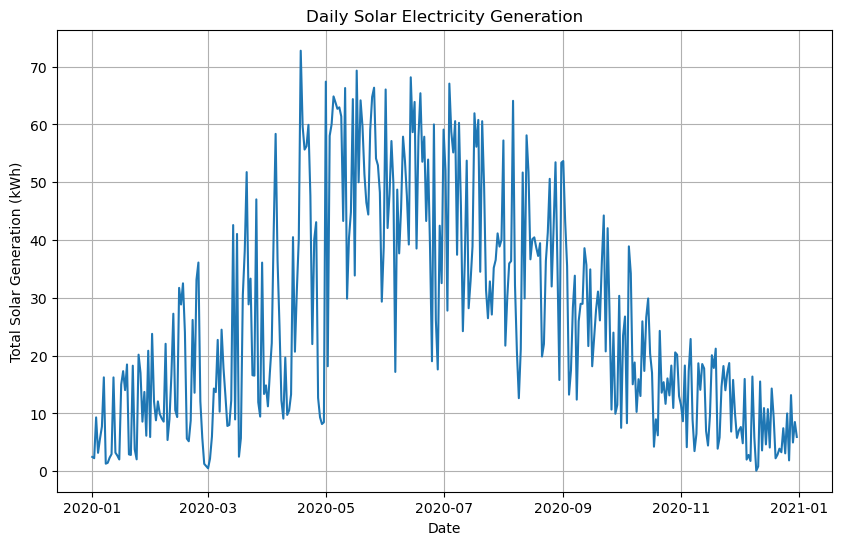

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('energy_analysis_data.csv')

# Convert 'Date/hour start' to datetime
df['Date/hour start'] = pd.to_datetime(df['Date/hour start'])

# Aggregate solar generation by day
daily_solar_generation = df.groupby(df['Date/hour start'].dt.date)['Solar electricity generation (kWh)'].sum().reset_index()

# Plotting daily solar generation
plt.figure(figsize=(10, 6))
plt.plot(daily_solar_generation['Date/hour start'], daily_solar_generation['Solar electricity generation (kWh)'])
plt.title('Daily Solar Electricity Generation')
plt.xlabel('Date')
plt.ylabel('Total Solar Generation (kWh)')
plt.grid(True)
plt.show()


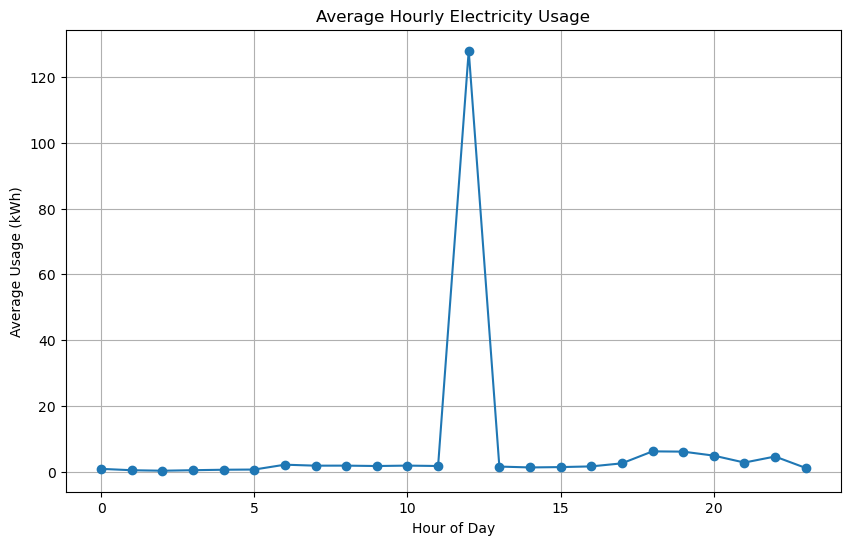

In [18]:
# Aggregate electricity usage by hour
hourly_usage = df.groupby('Hour')['Electricity usage (kWh)'].mean().reset_index()

# Plotting hourly electricity usage
plt.figure(figsize=(10, 6))
plt.plot(hourly_usage['Hour'], hourly_usage['Electricity usage (kWh)'], marker='o')
plt.title('Average Hourly Electricity Usage')
plt.xlabel('Hour of Day')
plt.ylabel('Average Usage (kWh)')
plt.grid(True)
plt.show()


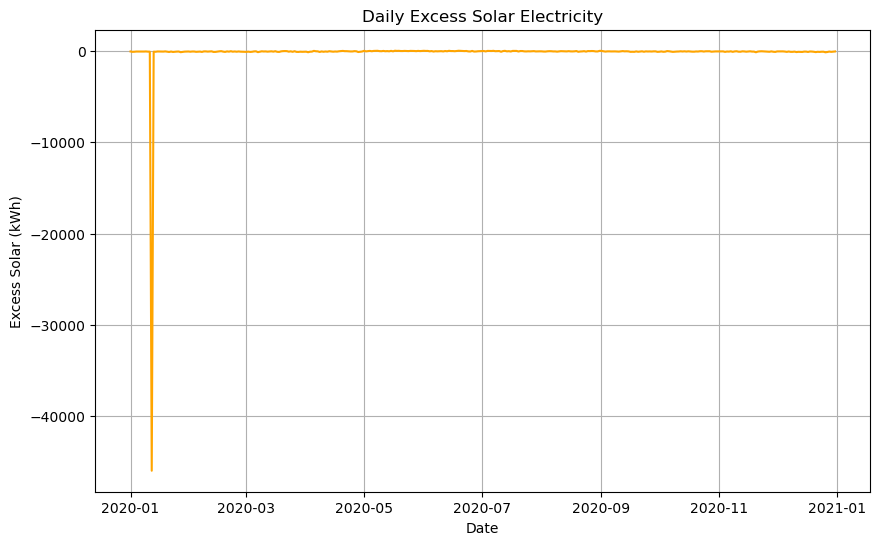

In [19]:
# Calculate excess solar generation
df['Excess Solar (kWh)'] = df['Solar electricity generation (kWh)'] - df['Electricity usage (kWh)']

# Aggregate excess solar by day
daily_excess_solar = df.groupby(df['Date/hour start'].dt.date)['Excess Solar (kWh)'].sum().reset_index()

# Plotting excess solar electricity available for storage
plt.figure(figsize=(10, 6))
plt.plot(daily_excess_solar['Date/hour start'], daily_excess_solar['Excess Solar (kWh)'], color='orange')
plt.title('Daily Excess Solar Electricity')
plt.xlabel('Date')
plt.ylabel('Excess Solar (kWh)')
plt.grid(True)
plt.show()

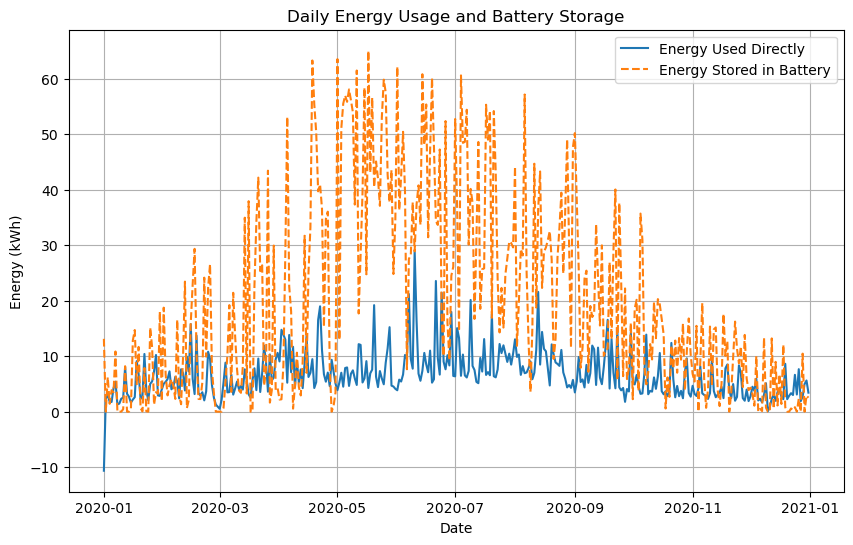

In [20]:
# Calculate energy used directly and energy stored in battery
df['Energy Used Directly (kWh)'] = df.apply(lambda row: row['Electricity usage (kWh)'] if row['Solar electricity generation (kWh)'] > row['Electricity usage (kWh)'] else row['Solar electricity generation (kWh)'], axis=1)
df['Energy Stored in Battery (kWh)'] = df.apply(lambda row: row['Solar electricity generation (kWh)'] - row['Electricity usage (kWh)'] if row['Solar electricity generation (kWh)'] > row['Electricity usage (kWh)'] else 0, axis=1)

# Aggregate by day
battery_analysis = df.groupby(df['Date/hour start'].dt.date)[['Energy Used Directly (kWh)', 'Energy Stored in Battery (kWh)']].sum().reset_index()

# Plotting energy used and stored in battery
plt.figure(figsize=(10, 6))
plt.plot(battery_analysis['Date/hour start'], battery_analysis['Energy Used Directly (kWh)'], label='Energy Used Directly')
plt.plot(battery_analysis['Date/hour start'], battery_analysis['Energy Stored in Battery (kWh)'], label='Energy Stored in Battery', linestyle='--')
plt.title('Daily Energy Usage and Battery Storage')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.grid(True)
plt.show()

Total Potential Savings: $734.35


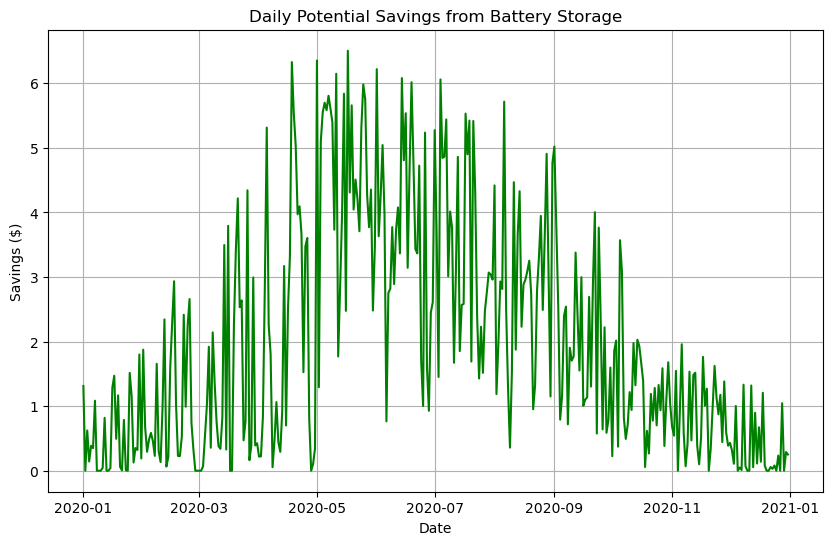

In [21]:
# Assume a fixed grid electricity price
grid_price = 0.10  # Example: $0.10 per kWh

# Calculate potential savings
battery_analysis['Potential Savings ($)'] = battery_analysis['Energy Stored in Battery (kWh)'] * grid_price

# Summarize total savings
total_savings = battery_analysis['Potential Savings ($)'].sum()
print(f"Total Potential Savings: ${total_savings:.2f}")

# Plotting potential savings over time
plt.figure(figsize=(10, 6))
plt.plot(battery_analysis['Date/hour start'], battery_analysis['Potential Savings ($)'], color='green')
plt.title('Daily Potential Savings from Battery Storage')
plt.xlabel('Date')
plt.ylabel('Savings ($)')
plt.grid(True)
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data for modeling
X = df[['Solar electricity generation (kWh)', 'Hour']]  # Example features
y = df['Electricity usage (kWh)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:", mean_squared_error(y_test, predictions))


Mean Squared Error: 228.14376653956398
